# Microsoft Stock Price Prediction

In [6]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install keras


Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install tensorflow

                                              0.0/276.6 MB ? eta -:--:--
                                              0.0/276.6 MB ? eta -:--:--
                                            0.1/276.6 MB 871.5 kB/s eta 0:05:18
                                            0.1/276.6 MB 871.5 kB/s eta 0:05:18
                                            0.1/276.6 MB 871.5 kB/s eta 0:05:18
                                            0.2/276.6 MB 860.2 kB/s eta 0:05:22
                                            0.3/276.6 MB 923.9 kB/s eta 0:05:00
                                              0.5/276.6 MB 1.3 MB/s eta 0:03:36
                                              0.5/276.6 MB 1.4 MB/s eta 0:03:15
                                              0.6/276.6 MB 1.3 MB/s eta 0:03:27
                                              0.7/276.6 MB 1.5 MB/s eta 0:03:01
                                              0.8/276.6 MB 1.5 MB/s eta 0:03:00
                                              0.9/276.

In [34]:
#Importing required modules
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Importing the Dataset

In [35]:
dataSet = pd.read_csv("MSFT.csv")
dataSet.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-16,46.009998,46.689999,45.970001,46.660000,41.087555,26271700
1,2015-07-17,46.549999,46.779999,46.259998,46.619999,41.052341,29467100
2,2015-07-20,46.650002,47.130001,46.439999,46.919998,41.316509,30631900
3,2015-07-21,46.779999,47.330002,46.480000,47.279999,41.633511,42781900
4,2015-07-22,45.439999,46.930000,45.200001,45.540001,40.101318,59152400
5,2015-07-23,45.270000,46.230000,45.099998,46.110001,40.603237,33934000
6,2015-07-24,45.910000,46.320000,45.799999,45.939999,40.453545,32333200
7,2015-07-27,45.939999,46.009998,45.250000,45.349998,39.934006,39701400
8,2015-07-28,45.580002,45.639999,44.790001,45.340000,39.925201,34328900
9,2015-07-29,45.400002,46.779999,45.259998,46.290001,40.761749,40945900


# Splitting the dataset

In [36]:
Train = dataSet.iloc[:800,1:2].values
Test = dataSet.iloc[800:,1:2].values

# Scaling the dataset

In [37]:
Sc = MinMaxScaler(feature_range=(0,1))
training_scaled = Sc.fit_transform(Train)

In [38]:
Xtrain=[]
Ytrain=[]
for i in range(60,800):
    Xtrain.append(training_scaled[i-60:i,0])
    Ytrain.append(training_scaled[i,0])
Xtrain = np.array(Xtrain)
Ytrain = np.array(Ytrain)
Xtrain = np.reshape(Xtrain,(Xtrain.shape[0],Xtrain.shape[1],1))

# Implementing the LSTM model

In [39]:
lstm = Sequential()
lstm.add(LSTM(units=50,return_sequences = True,input_shape=(Xtrain.shape[1],1)))
lstm.add(Dropout(0.2))
lstm.add(LSTM(units=50,return_sequences=True))
lstm.add(Dropout(0.2))
lstm.add(LSTM(units=50,return_sequences=True))
lstm.add(Dropout(0.2))
lstm.add(LSTM(units=50))
lstm.add(Dropout(0.2))
lstm.add(Dense(units=1))
lstm.compile(optimizer='adam',loss='mean_squared_error')
lstm.fit(Xtrain,Ytrain,epochs=100,batch_size=32)

Epoch 1/100
24/24 [==============================] - 13s 152ms/step - loss: 0.0339
Epoch 2/100
24/24 [==============================] - 4s 164ms/step - loss: 0.0048
Epoch 3/100
24/24 [==============================] - 4s 162ms/step - loss: 0.0042
Epoch 4/100
24/24 [==============================] - 4s 163ms/step - loss: 0.0039
Epoch 5/100
24/24 [==============================] - 4s 157ms/step - loss: 0.0033
Epoch 6/100
24/24 [==============================] - 3s 132ms/step - loss: 0.0036
Epoch 7/100
24/24 [==============================] - 4s 172ms/step - loss: 0.0030
Epoch 8/100
24/24 [==============================] - 4s 163ms/step - loss: 0.0033
Epoch 9/100
24/24 [==============================] - 4s 162ms/step - loss: 0.0031
Epoch 10/100
24/24 [==============================] - 4s 158ms/step - loss: 0.0042
Epoch 11/100
24/24 [==============================] - 4s 160ms/step - loss: 0.0033
Epoch 12/100
24/24 [==============================] - 4s 162ms/step - loss: 0.0037
Epoch 13/100

# Prediction

In [40]:
dataTrain = dataSet.iloc[:800,1:2]
dataTest = dataSet.iloc[800:,1:2]
dataTotal = pd.concat((dataTrain,dataTest),axis=0)
totalInput = dataTotal[len(dataTotal)-len(dataTest)-60:].values
totalInput = totalInput.reshape(-1,1)
totalInput = Sc.transform(totalInput)
X_test=[]
for i in range(60,519):
    X_test.append(totalInput[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
print(X_test.shape)

predicted_price = lstm.predict(X_test)
predicted_price = Sc.inverse_transform(predicted_price)


(459, 60, 1)
15/15 [==============================] - 3s 56ms/step


# Plotting the result

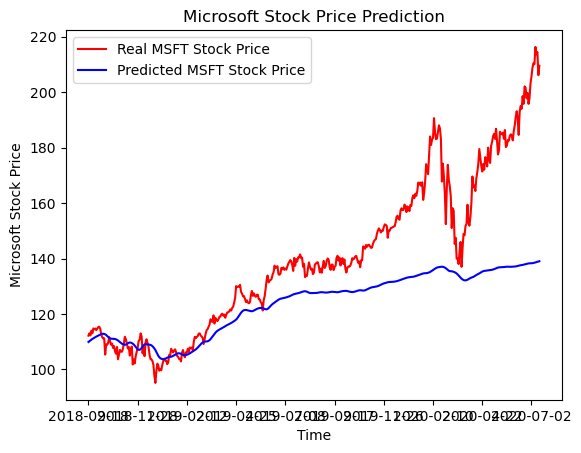

In [41]:
plt.plot(dataSet.loc[800:, 'Date'],dataTest.values, color = 'red', label = 'Real MSFT Stock Price')
plt.plot(dataSet.loc[800:, 'Date'],predicted_price, color = 'blue', label = 'Predicted MSFT Stock Price')
plt.xticks(np.arange(0,459,50))
plt.title('Microsoft Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Microsoft Stock Price')
plt.legend()
plt.show()